# init Seaborn

### pd.read_csv() -> df.head() -> sns.pairplot(df)

In [1]:
import pandas as pd
import seaborn as sns
sns.__file__

'/opt/anaconda3/lib/python3.7/site-packages/seaborn/__init__.py'

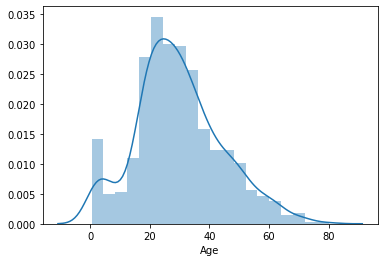

In [2]:
df = pd.read_csv('train.csv')
df = df.dropna(subset=['Age'])
sns.distplot(df['Age'])
# kde=False

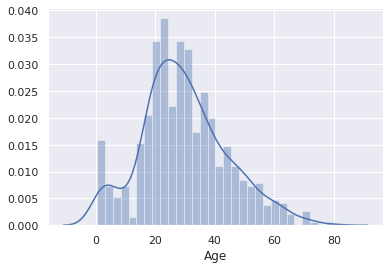

In [3]:
sns.set()
sns.distplot(df['Age'], bins=30)

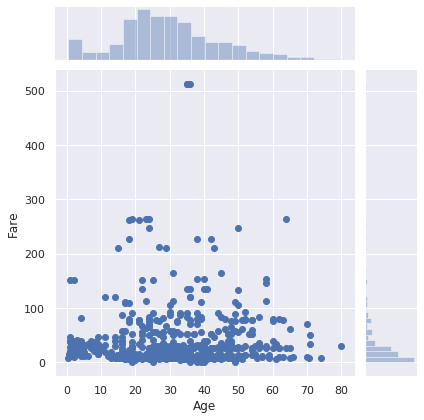

In [4]:
sns.jointplot(x='Age', y='Fare', data=df)

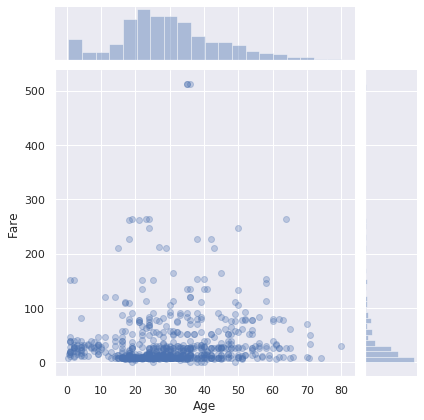

In [5]:
sns.jointplot(x='Age', y='Fare', data=df, alpha=0.3)

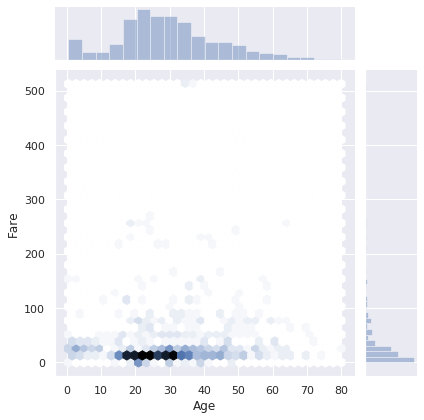

In [6]:
sns.jointplot(x='Age', y='Fare', data=df, kind='hex')

sns.pairplot() (<- most important func!)

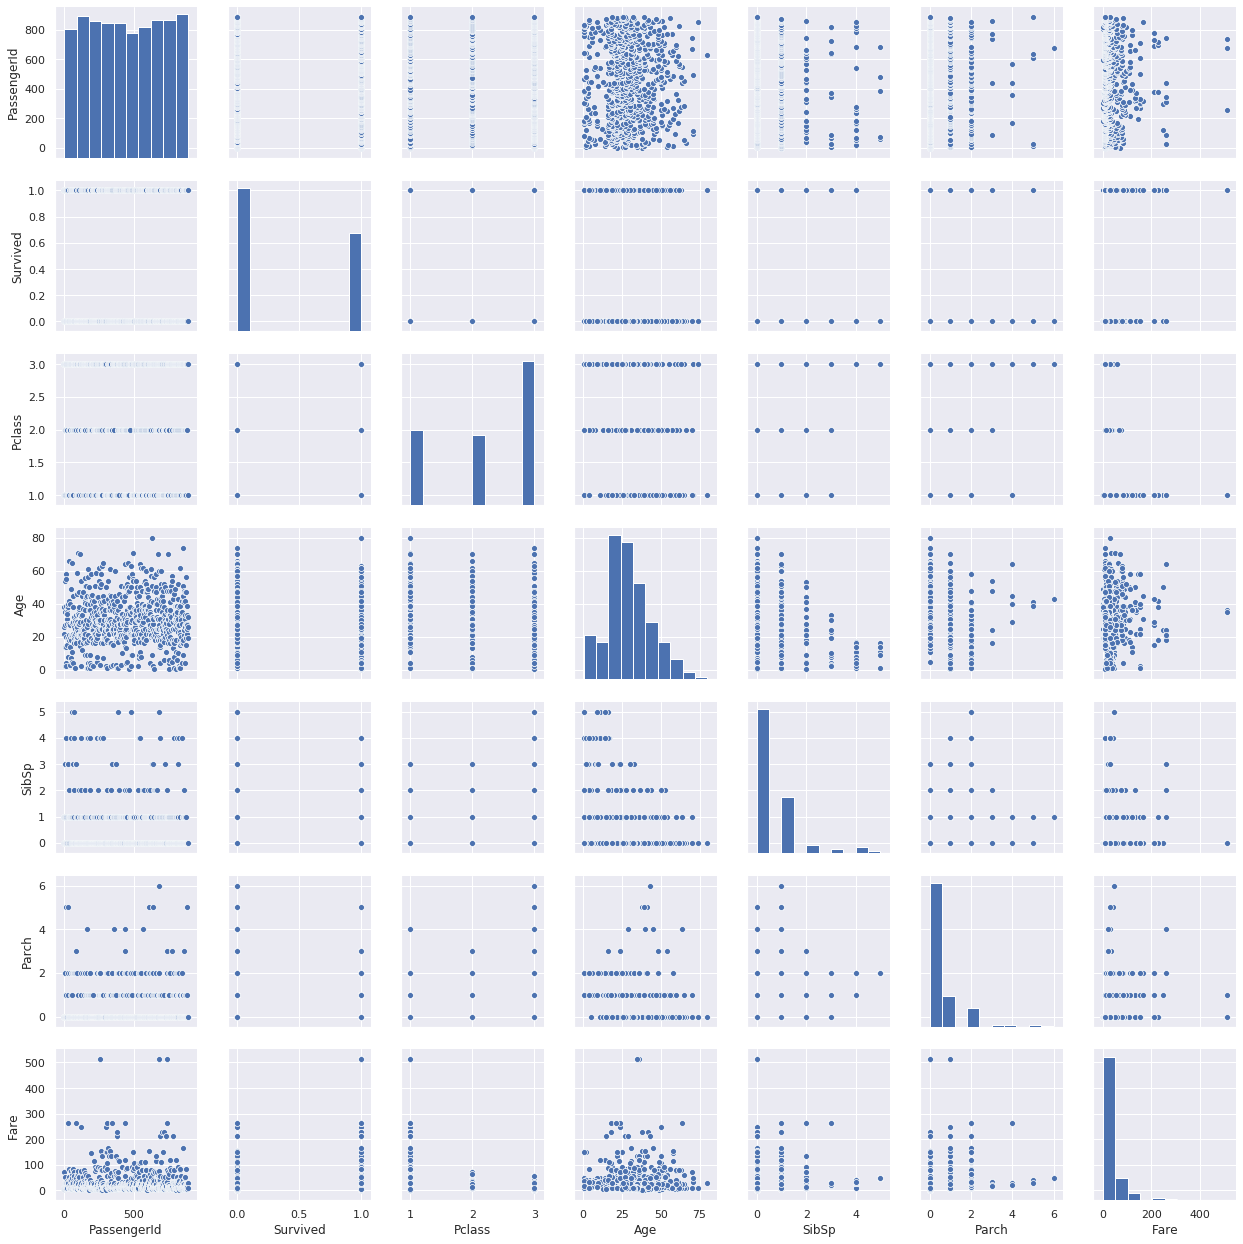

In [7]:
sns.pairplot(df)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


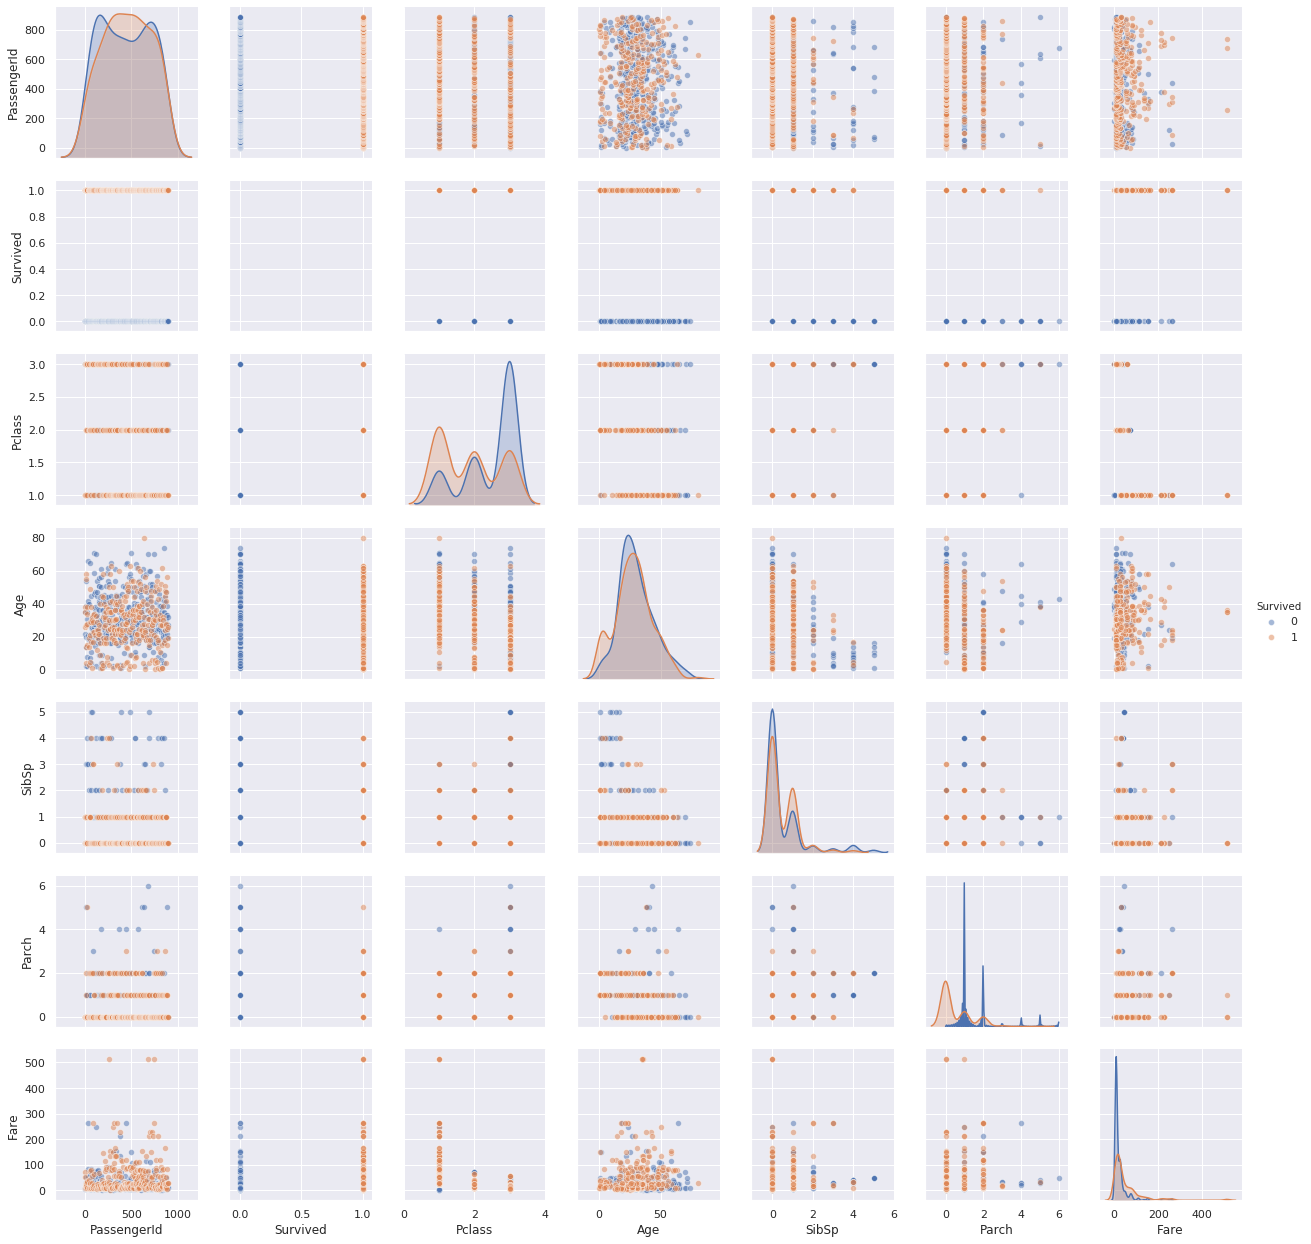

In [8]:
sns.pairplot(df, hue='Survived', kind='scatter', plot_kws={'alpha':0.5})

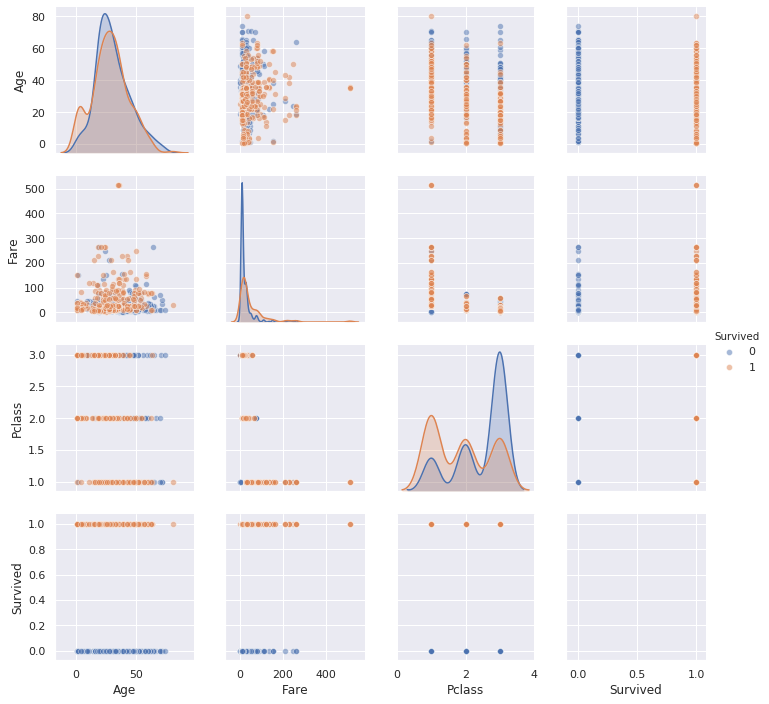

In [9]:
# eliminate columns that are not needed
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', plot_kws={'alpha':0.5})

# Categorical Plot

sns.barplot()

In [10]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


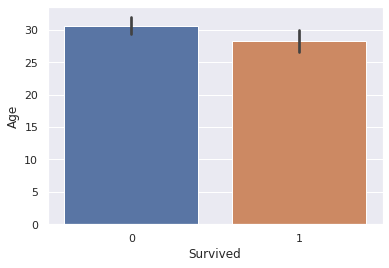

In [11]:
sns.barplot(x='Survived', y='Age', data=df)
# error bar

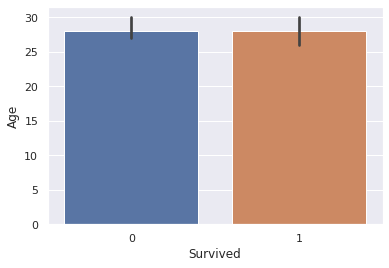

In [12]:
import numpy as np
sns.barplot(x='Survived', y='Age', data=df, estimator=np.median)

sns.countplot()

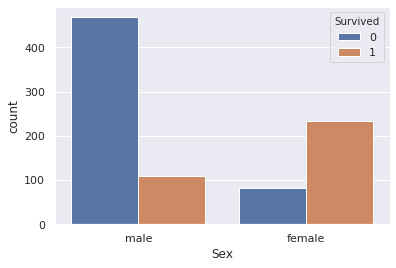

In [13]:
sns.countplot(x='Sex', data=df, hue='Survived')

sns.boxplot() (important!)

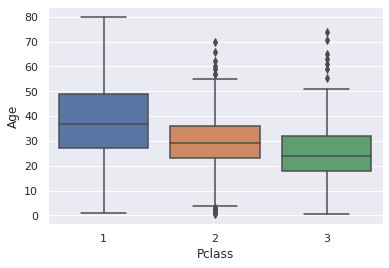

In [14]:
sns.boxplot(x='Pclass', y='Age', data=df)

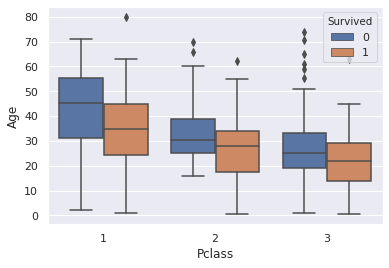

In [15]:
sns.boxplot(x='Pclass', y='Age', data=df, hue='Survived')

sns.violinplot()

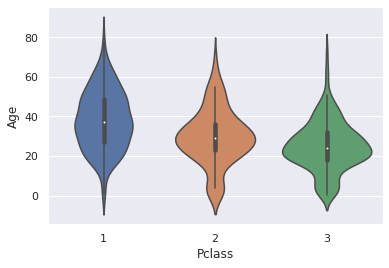

In [16]:
sns.violinplot(x='Pclass', y='Age', data=df)

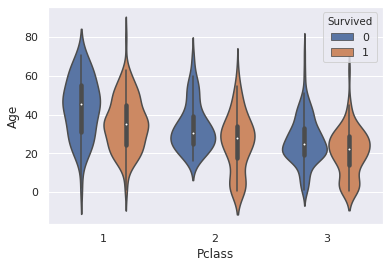

In [17]:
sns.violinplot(x='Pclass', y='Age', data=df, hue='Survived')

sns.swarmplot() (important!)

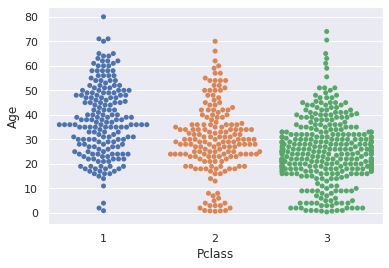

In [18]:
sns.swarmplot(x='Pclass', y='Age', data=df)

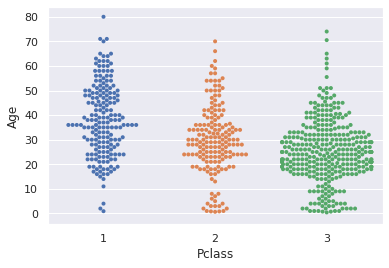

In [19]:
sns.swarmplot(x='Pclass', y='Age', data=df, size=4)

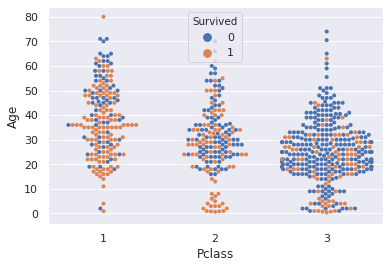

In [20]:
sns.swarmplot(x='Pclass', y='Age', data=df, size=4, hue='Survived')

# Heatmap

In [21]:
df = pd.read_csv('train.csv')
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
type(corr)

pandas.core.frame.DataFrame

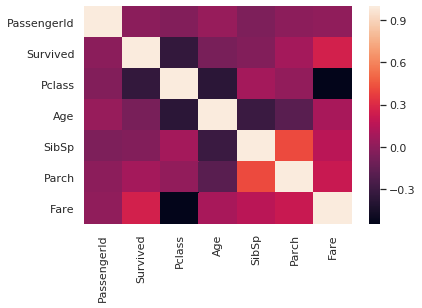

In [24]:
sns.heatmap(corr)

In [29]:
# heatmaps don't display well -> you need to downgrade matplotlib
# $ docker exec -it {name} bash
# $ pip install matplotlib==3.1.0
# restart Jupyter-kernel
import matplotlib
matplotlib.__version__

'3.1.0'

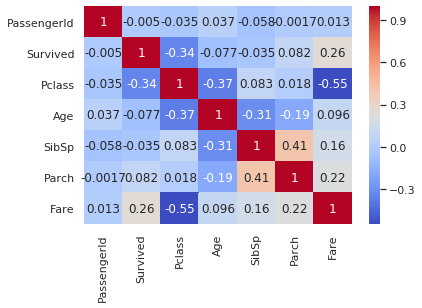

In [25]:
sns.heatmap(corr, cmap='coolwarm', annot=True)
# PassengerId: No correlation

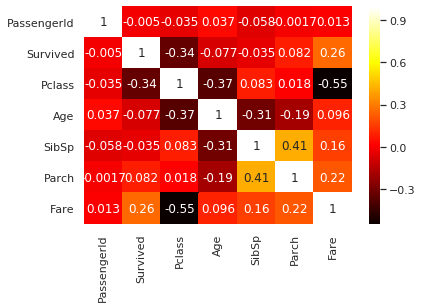

In [28]:
sns.heatmap(corr, cmap='hot', annot=True)

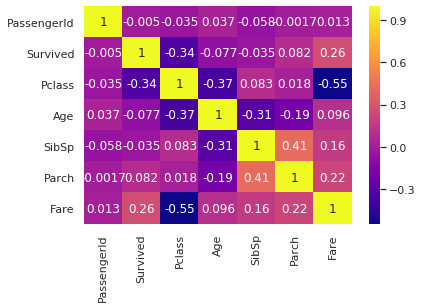

In [30]:
sns.heatmap(corr, cmap='plasma', annot=True)

In [34]:
flights = sns.load_dataset('flights')
print(type(flights))
print(len(flights))
flights.head()

<class 'pandas.core.frame.DataFrame'>
144


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [35]:
# make pivot table
flights_pivot = flights.pivot_table(index='month', columns='year', values='passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


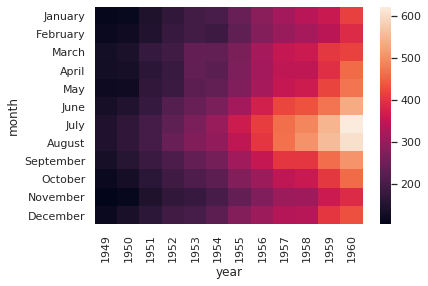

In [36]:
sns.heatmap(flights_pivot)

# Style

- sns.set()
    - context
    - style
    - palette

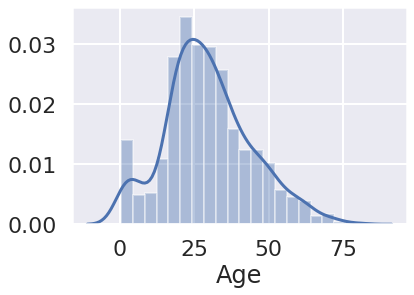

In [44]:
df = pd.read_csv('train.csv')

# notebook, paper, talk, poster
sns.set(context='poster')
df = df.dropna(subset=['Age'])
sns.distplot(df['Age'])

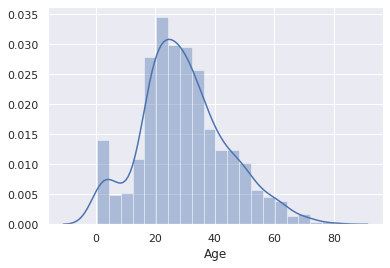

In [46]:
sns.set_context('notebook')
sns.distplot(df['Age'])

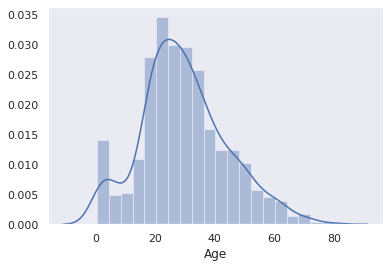

In [53]:
sns.set_style('dark')
sns.distplot(df['Age'])

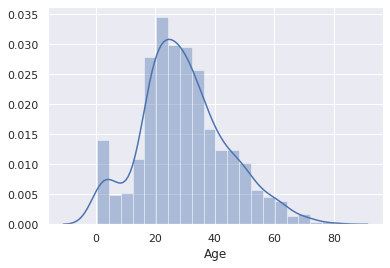

In [54]:
sns.set_style('darkgrid')
sns.distplot(df['Age'])

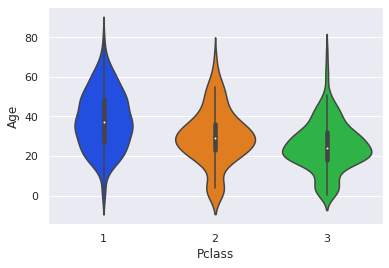

In [56]:
sns.set_palette('bright')
sns.violinplot(x='Pclass', y='Age', data=df)

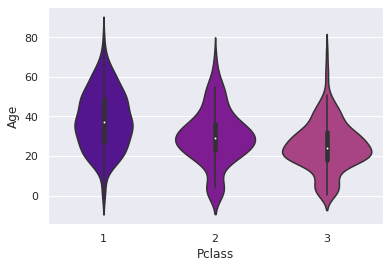

In [61]:
sns.set(palette='plasma')
sns.violinplot(x='Pclass', y='Age', data=df)

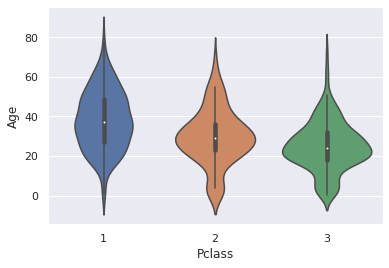

In [65]:
sns.set(palette='deep')
sns.violinplot(x='Pclass', y='Age', data=df)

sns.despine()

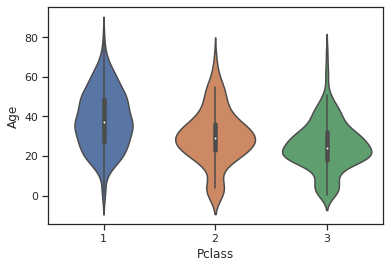

In [66]:
sns.set(style='ticks')
sns.violinplot(x='Pclass', y='Age', data=df)

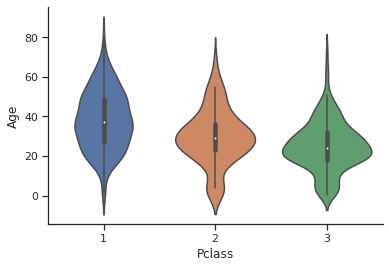

In [67]:
sns.violinplot(x='Pclass', y='Age', data=df)
sns.despine()

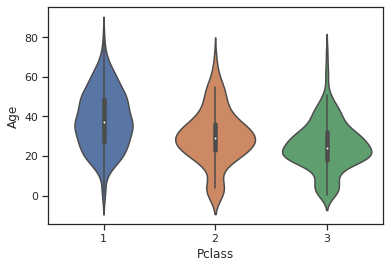

In [68]:
sns.violinplot(x='Pclass', y='Age', data=df)

In [69]:
sns.set(style='darkgrid')

matplotlib

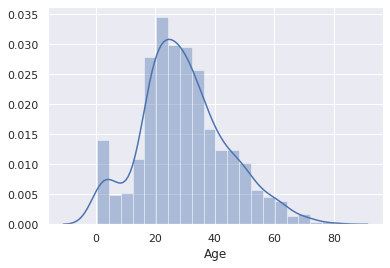

In [72]:
sns.distplot(df['Age'])

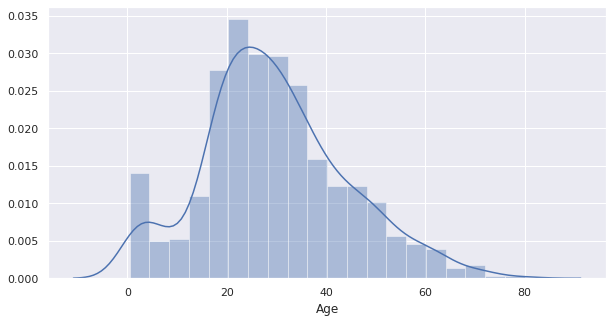

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.distplot(df['Age'])

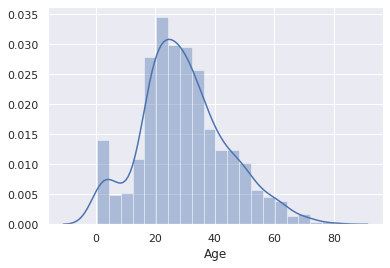

In [74]:
sns.distplot(df['Age'])
plt.savefig('seaborn_sample.png')